## Foundations of Deep Learning 24/25 // Data Science MSc - unimib

### Temporal Convolutional Networks and the Tennessee Eastman Process dataset 

### Exploration  

 E. Mosca - 925279

#### *Data Introduction*

The Tennessee Eastman Process(TEP) dataset is an industrial anomaly detection bencmark, containing data about simulations of a chemical process involving multiple components and process units. In the data we have both simulations representing "normal" operating conditions and "anomalous" ones. 
- The anomalies are simulated by artificially introducing a fault in the process at a certain time after the start of the process(1h after start in Train data, 8h after start in test data).
- The sample frequency is 3minutes, so anomalies occur after at time 20 in the training data and at time 160 in the test data.
- The train and test simulations have different durations, we have 500 samples per simulation in the training data(so 25hrs) and 960 in the test data(so 48hrs)
- The faults introduced into the process vary in nature, with a total of 20 types(classes) of anomalous processes.
- The dataset is divided into four .parquet files: the first two represent "normal" train and test data respectively, and analogously, the other two the "anomalous" train and test data.
- There are a total of 55 variables in the dataset, 3 are "indexing"/class variables, like the class label("faultNumber"), simulation ID ("simulationRun") and the respective time point("sample").
- The other variables are those quantifying the dynamics of the chemical process: 41 of them(prefixed by "xmeas_") represent measured process variables, while the other 11(prefixed by "xmv_") represent manipulated variables i.e. factors that can be controlled by the person operating the process, like component valves and the agitator's speed. 

Notes: 
- The data was originally supplied by Rieth et al.(https://link.springer.com/chapter/10.1007/978-3-319-60384-1_6) 
- Understanding data dynamics was made easier thanks to https://keepfloyding.github.io/posts/Ten-East-Proc-Intro/ and subsequent related blog posts
- The loaded dataset is a .parquet converted csv file, obtainable from the following Kaggle page: https://www.kaggle.com/datasets/afrniomelo/tep-csv , the way the fiiles were converted is available in the "csvtoparquet.ipynb" project file 
- Ive uploaded the parquet files to the following kaggle page: https://www.kaggle.com/datasets/edmos07/tennesseeeastmanprocessrieth-et-al-2017-parquet

#### *Data Exploration*

In [1]:
import pandas as pd

In [2]:
# We strt by taking a look at the normal training set
norm_train = pd.read_parquet("./data/TEP_FaultFree_Training.parquet")

In [4]:
norm_train.columns

Index(['faultNumber', 'simulationRun', 'sample', 'xmeas_1', 'xmeas_2',
       'xmeas_3', 'xmeas_4', 'xmeas_5', 'xmeas_6', 'xmeas_7', 'xmeas_8',
       'xmeas_9', 'xmeas_10', 'xmeas_11', 'xmeas_12', 'xmeas_13', 'xmeas_14',
       'xmeas_15', 'xmeas_16', 'xmeas_17', 'xmeas_18', 'xmeas_19', 'xmeas_20',
       'xmeas_21', 'xmeas_22', 'xmeas_23', 'xmeas_24', 'xmeas_25', 'xmeas_26',
       'xmeas_27', 'xmeas_28', 'xmeas_29', 'xmeas_30', 'xmeas_31', 'xmeas_32',
       'xmeas_33', 'xmeas_34', 'xmeas_35', 'xmeas_36', 'xmeas_37', 'xmeas_38',
       'xmeas_39', 'xmeas_40', 'xmeas_41', 'xmv_1', 'xmv_2', 'xmv_3', 'xmv_4',
       'xmv_5', 'xmv_6', 'xmv_7', 'xmv_8', 'xmv_9', 'xmv_10', 'xmv_11'],
      dtype='object')

In [5]:
norm_train.head()

,faultNumber,simulationRun,sample,xmeas_1,xmeas_2,xmeas_3,xmeas_4,xmeas_5,xmeas_6,xmeas_7,...,xmv_2,xmv_3,xmv_4,xmv_5,xmv_6,xmv_7,xmv_8,xmv_9,xmv_10,xmv_11
0,0,1,1,0.25038,3674.0,4529.0,9.2320,26.889,42.402,2704.3,...,53.744,24.657,62.544,22.137,39.935,42.323,47.757,47.510,41.258,18.447
1,0,1,2,0.25109,3659.4,4556.6,9.4264,26.721,42.576,2705.0,...,53.414,24.588,59.259,22.084,40.176,38.554,43.692,47.427,41.359,17.194
2,0,1,3,0.25038,3660.3,4477.8,9.4426,26.875,42.070,2706.2,...,54.357,24.666,61.275,22.380,40.244,38.990,46.699,47.468,41.199,20.530
3,0,1,4,0.24977,3661.3,4512.1,9.4776,26.758,42.063,2707.2,...,53.946,24.725,59.856,22.277,40.257,38.072,47.541,47.658,41.643,18.089
4,0,1,5,0.29405,3679.0,4497.0,9.3381,26.889,42.650,2705.1,...,53.658,28.797,60.717,21.947,39.144,41.955,47.645,47.346,41.507,18.461


In [8]:
norm_train[495:501]

,faultNumber,simulationRun,sample,xmeas_1,xmeas_2,xmeas_3,xmeas_4,xmeas_5,xmeas_6,xmeas_7,...,xmv_2,xmv_3,xmv_4,xmv_5,xmv_6,xmv_7,xmv_8,xmv_9,xmv_10,xmv_11
495,0,1,496,0.24602,3651.9,4504.4,9.4721,26.600,42.312,2707.2,...,54.132,23.663,59.588,22.481,38.952,33.489,45.203,49.900,41.057,16.448
496,0,1,497,0.23457,3663.0,4529.5,9.3440,26.872,42.434,2704.1,...,54.028,22.776,60.566,22.237,42.978,38.017,42.637,50.075,41.339,17.435
497,0,1,498,0.23068,3656.4,4493.0,9.2978,26.920,42.536,2700.3,...,54.465,23.158,62.102,21.639,42.483,41.016,46.782,50.098,41.277,18.315
498,0,1,499,0.24263,3632.5,4521.5,9.3915,26.956,42.317,2701.9,...,54.532,23.386,63.164,22.661,39.558,37.892,47.468,50.312,40.557,19.198
499,0,1,500,0.23958,3629.7,4566.3,9.5071,27.219,42.757,2703.8,...,53.996,23.686,59.553,22.749,40.036,37.977,52.375,50.728,41.145,19.029
500,0,2,1,0.25225,3683.6,4499.5,9.3306,26.713,42.420,2706.4,...,54.098,24.474,62.513,22.178,39.661,42.864,46.936,47.381,41.427,15.683


The simulation order is clear in the normal dataset, as the faultNumber is 0(normal class), each simulationRun value follows the previous one sequentially

In [7]:
# The dtypes are all floats except for first columns
norm_train.dtypes.head()

faultNumber        int64
simulationRun      int64
sample             int64
xmeas_1          float64
xmeas_2          float64
dtype: object

What is of interest is understanding what "normal operating conditions" look like. As there are many simulations and variables, we are going to plot the (standardized, given different magnitudes) values from a few simulations through time.

In [4]:
# Standardize
fft_scaled = norm_train.drop(columns=["faultNumber", "simulationRun", "sample"]).apply(lambda x: (x - x.mean()) / x.std())
# Add back columns
fft_scaled = pd.concat(
    [norm_train[["faultNumber", "simulationRun", "sample"]], fft_scaled], axis=1
)
fft_scaled.head()

,faultNumber,simulationRun,sample,xmeas_1,xmeas_2,xmeas_3,xmeas_4,xmeas_5,xmeas_6,xmeas_7,...,xmv_2,xmv_3,xmv_4,xmv_5,xmv_6,xmv_7,xmv_8,xmv_9,xmv_10,xmv_11
0,0,1,1,-0.003307,0.300364,0.514599,-1.342731,-0.062398,0.294726,-0.098047,...,-0.489006,0.005770,1.001362,-0.150228,-0.078897,1.424527,0.520011,-0.165134,0.284191,0.224294
1,0,1,2,0.019690,-0.128967,1.218404,0.925080,-0.856779,1.091016,-0.005032,...,-1.191637,-0.016944,-1.639727,-0.250199,0.078954,0.153478,-1.208816,-0.195688,0.470946,-0.631769
2,0,1,3,-0.003307,-0.102502,-0.791010,1.114064,-0.128596,-1.224631,0.154424,...,0.816185,0.008733,-0.018895,0.308127,0.123493,0.300513,0.070048,-0.180595,0.175097,1.647422
3,0,1,4,-0.023065,-0.073095,0.083646,1.522363,-0.681826,-1.256665,0.287304,...,-0.058910,0.028155,-1.159749,0.113845,0.132008,-0.009071,0.428147,-0.110653,0.996077,-0.020296
4,0,1,5,1.411175,0.447396,-0.301407,-0.105001,-0.062398,1.429668,0.008256,...,-0.672116,1.368624,-0.467518,-0.508613,-0.596991,1.300424,0.472378,-0.225506,0.744606,0.233859


In [12]:
# even if standardized, we have(max and min) values going down to -4 and up to 4 
round(fft_scaled.describe(),3)

,faultNumber,simulationRun,sample,xmeas_1,xmeas_2,xmeas_3,xmeas_4,xmeas_5,xmeas_6,xmeas_7,...,xmv_2,xmv_3,xmv_4,xmv_5,xmv_6,xmv_7,xmv_8,xmv_9,xmv_10,xmv_11
count,250000.0,250000.000,250000.000,250000.000,250000.000,250000.000,250000.000,250000.000,250000.000,250000.000,...,250000.000,250000.000,250000.000,250000.000,250000.000,250000.000,250000.000,250000.000,250000.000,250000.000
mean,0.0,250.500,250.500,-0.000,0.000,0.000,-0.000,0.000,-0.000,0.000,...,-0.000,-0.000,-0.000,0.000,-0.000,-0.000,0.000,-0.000,0.000,-0.000
std,0.0,144.338,144.338,1.000,1.000,1.000,1.000,1.000,1.000,1.000,...,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000
min,0.0,1.000,1.000,-4.147,-4.469,-4.384,-4.368,-4.498,-4.318,-4.350,...,-4.000,-4.168,-4.291,-4.655,-4.366,-4.094,-4.082,-4.166,-4.656,-4.382
25%,0.0,125.750,125.750,-0.671,-0.676,-0.674,-0.674,-0.682,-0.685,-0.656,...,-0.674,-0.671,-0.680,-0.665,-0.678,-0.681,-0.682,-0.623,-0.674,-0.675
50%,0.0,250.500,250.500,0.001,-0.003,-0.001,-0.000,-0.001,0.002,-0.005,...,0.001,0.001,-0.000,0.001,0.002,-0.003,-0.002,-0.051,-0.001,0.000
75%,0.0,375.250,375.250,0.671,0.677,0.675,0.677,0.680,0.684,0.659,...,0.674,0.670,0.680,0.663,0.674,0.681,0.683,0.623,0.676,0.678
max,0.0,500.000,500.000,4.575,4.253,4.459,4.464,4.330,4.208,4.526,...,4.566,4.514,4.136,4.354,4.875,4.259,4.214,4.291,5.225,4.539


We are going to pick 10 simulations at random and visualize their manipulated variables values

In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
# Pick 10 random simulation runs
random_runs = np.random.choice(fft_scaled['simulationRun'].unique(), size=10, replace=False)
random_runs

array([118,  64,  94,  54,  60, 326, 358, 475, 339,  70], dtype=int64)

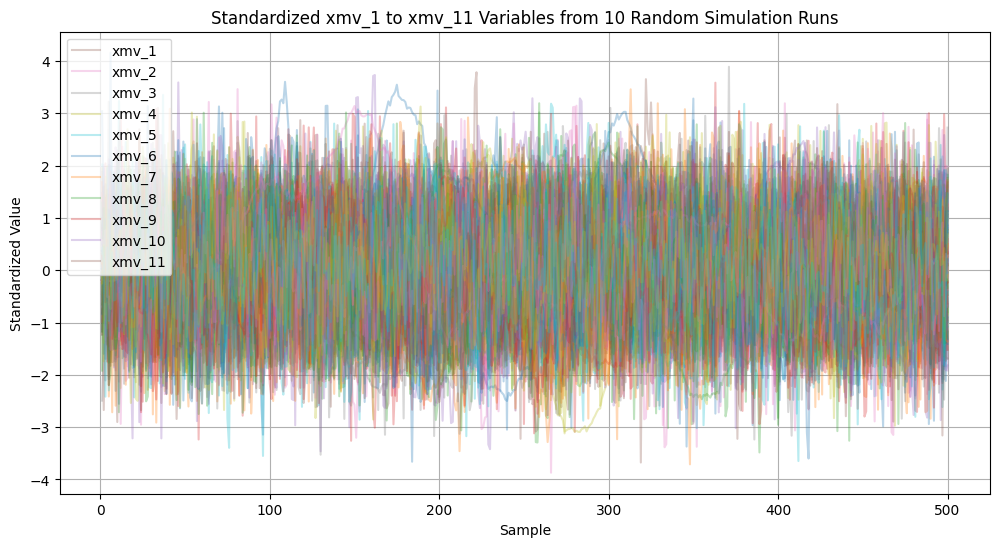

In [7]:
plt.figure(figsize=(12, 6))
for sim_run, group in fft_scaled.groupby('simulationRun'):
    if sim_run not in random_runs:
        continue
    for i in range(1, 12):
        plt.plot(group['sample'], group[f"xmv_{i}"], label=f"xmv_{i}" if sim_run == random_runs[0] else "", alpha=0.3)
plt.title("Standardized xmv_1 to xmv_11 Variables from 10 Random Simulation Runs")
plt.xlabel("Sample")
plt.ylabel("Standardized Value")
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())
plt.grid()

The data concentrates around 0 given standardization, and the xmv variables don't heavily fluctuate away through time, but it does seem like simulation values ca be noisy and oscillate quite a bit

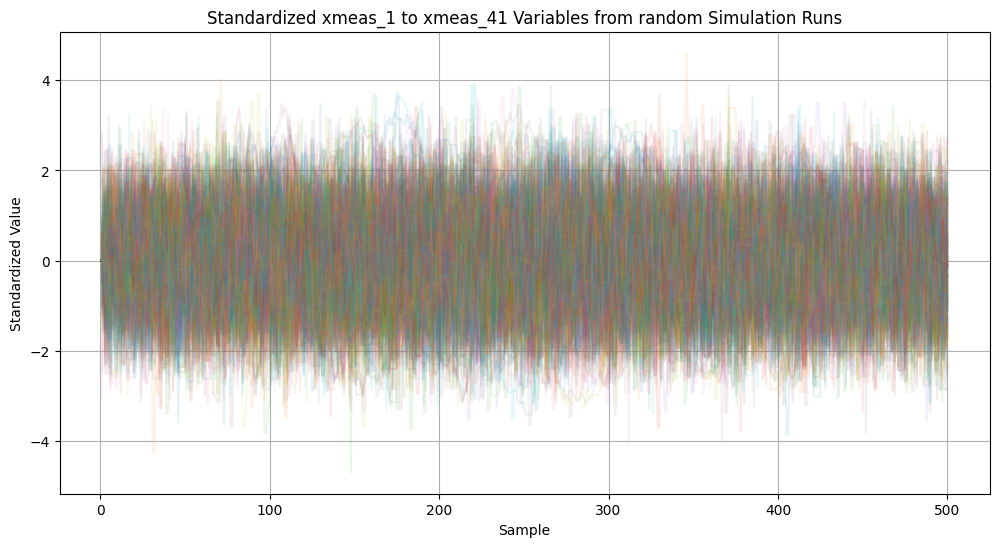

In [8]:
# Now we do the same for measured variables
plt.figure(figsize=(12, 6))
for sim_run, group in fft_scaled.groupby('simulationRun'):
    if sim_run not in random_runs:
        continue
    for i in range(1, 42):
        plt.plot(group['sample'], group[f"xmeas_{i}"], label=f"xmeas_{i}" if sim_run == random_runs[0] else "", alpha=0.1)
plt.title("Standardized xmeas_1 to xmeas_41 Variables from random Simulation Runs")
plt.xlabel("Sample")
plt.ylabel("Standardized Value")
plt.grid()

Although a bit messy, we can see that measured variables in normal operating conditions have similar behavior. But still single variables do not stay still through time and, although staying around their center, they fluctuate a bit, as can be seen with the below plot

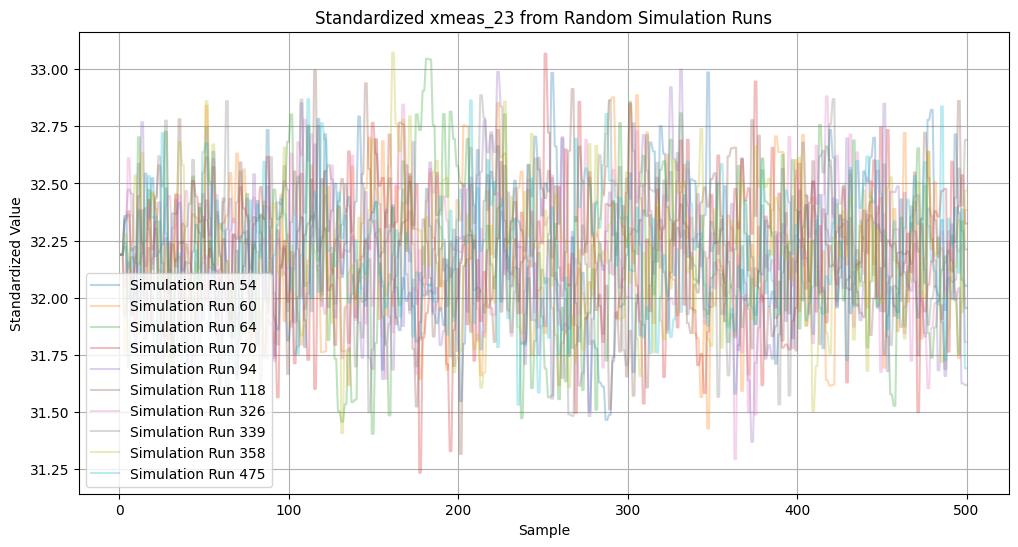

In [9]:
#Plot a variable from random simulation runs
var = 'xmeas_23'  
plt.figure(figsize=(12, 6))
for sim_run, group in norm_train.groupby('simulationRun'):
    if sim_run not in random_runs:
        continue
    plt.plot(group['sample'], group[var], label=f"Simulation Run {sim_run}", alpha=0.3)
plt.title(f"Standardized {var} from Random Simulation Runs")
plt.xlabel("Sample")
plt.ylabel("Standardized Value")
plt.legend()
plt.grid()

In [3]:
# Now we move to the anomalous data
anom_train = pd.read_parquet(".\data\TEP_Faulty_Training.parquet")

The main difference is the presence of multiple fault numbers, and that anomalies are introduced at the 1h mark.

In [10]:
#First we standardize the anomalous data with the same mean and std as the normal data
anom_scaled = anom_train.drop(columns=["faultNumber", "simulationRun", "sample"]).apply(
    lambda x: (x - norm_train[x.name].mean()) / norm_train[x.name].std()
)
# Add back the non-normalized columns
anom_scaled = pd.concat(
    [anom_train[["faultNumber", "simulationRun", "sample"]], anom_scaled], axis=1
)

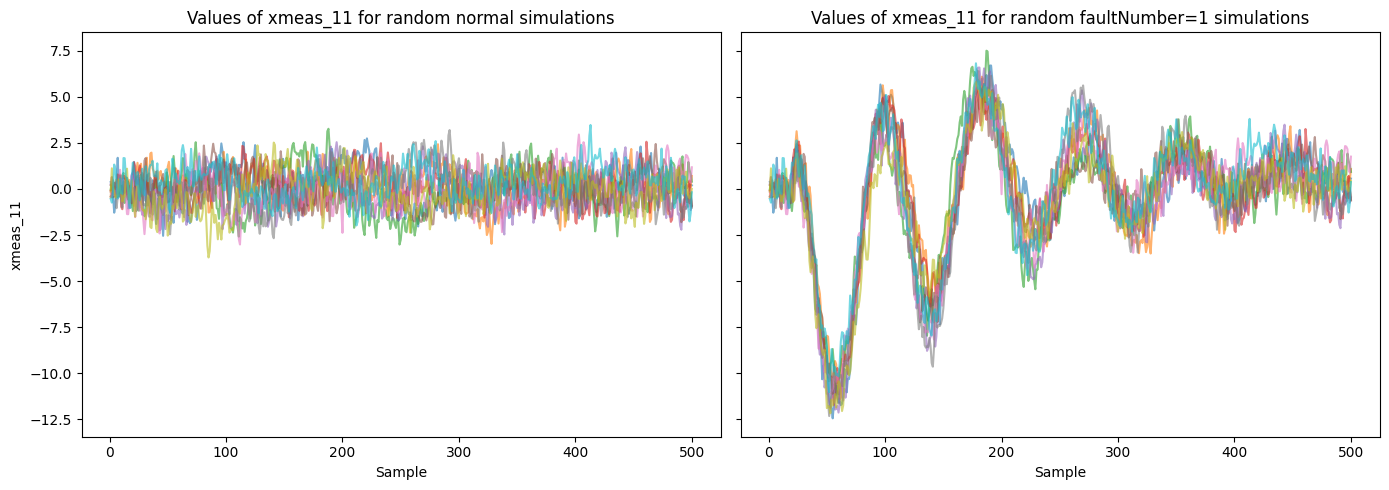

In [ ]:
var = "xmeas_11" # can visualize other vars by changing name
fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharey=True)

# Plot for fft_scaled 
for sim_run, group in fft_scaled.groupby("simulationRun"):
    if sim_run not in random_runs:
        continue
    axes[0].plot(group["sample"], group[var], alpha=0.6)
axes[0].set_title(f'Values of {var} for random normal simulations')
axes[0].set_xlabel('Sample')
axes[0].set_ylabel(var)

fn = 1
# Plot for anom_scaled with faultNumber == 1 , but can change fn
for sim_run, group in anom_scaled[anom_scaled["faultNumber"] == fn].groupby("simulationRun"):
    if sim_run not in random_runs:
        continue
    axes[1].plot(group["sample"], group[var], alpha=0.6)
axes[1].set_title(f'Values of {var} for random faultNumber=1 simulations')
axes[1].set_xlabel('Sample')

plt.tight_layout()
plt.show()

Looking at the first faultNumber, we can see that close to the 20th sample, measured variable 11 wildly fluctuates, starting to return to somewhat normal behavior towards the end of the simulation.

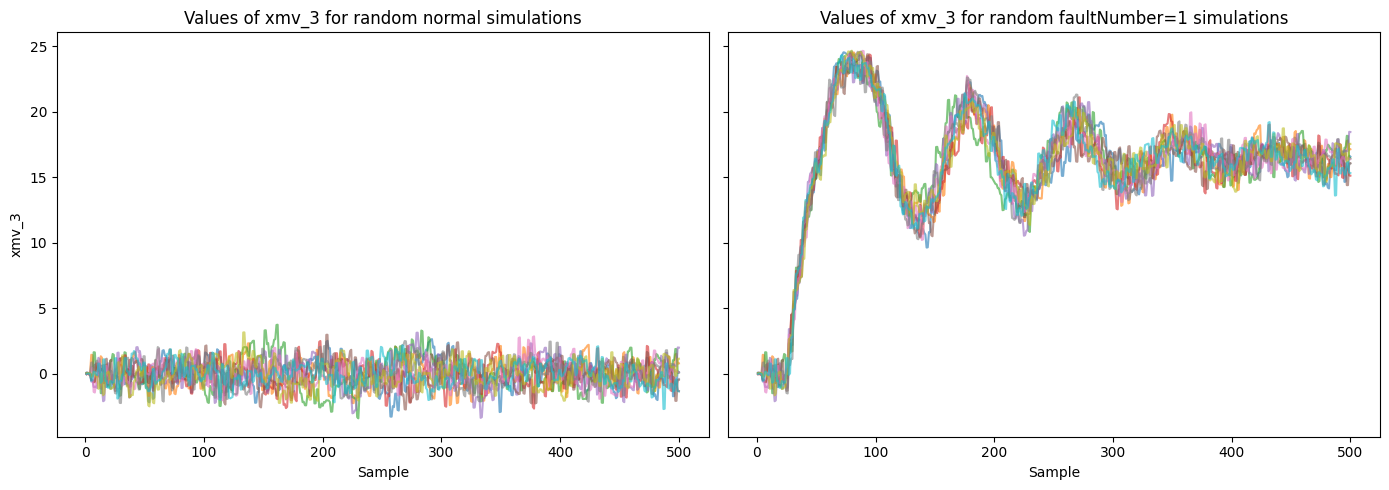

In [ ]:
var = "xmv_3"
fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharey=True)

# Plot for fft_scaled 
for sim_run, group in fft_scaled.groupby("simulationRun"):
    if sim_run not in random_runs:
        continue
    axes[0].plot(group["sample"], group[var], alpha=0.6)
axes[0].set_title(f'Values of {var} for random normal simulations')
axes[0].set_xlabel('Sample')
axes[0].set_ylabel(var)

# Plot for anom_scaled with faultNumber == 1 
for sim_run, group in anom_scaled[anom_scaled["faultNumber"] == 1].groupby("simulationRun"):
    if sim_run not in random_runs:
        continue
    axes[1].plot(group["sample"], group[var], alpha=0.6)
axes[1].set_title(f'Values of {var} for random faultNumber=1 simulations')
axes[1].set_xlabel('Sample')

plt.tight_layout()
plt.show()

Some, although not all, manipulated variables go even crazier(for faultNumber 1 xmv_3 might be tied to the source of the introduced anomaly)

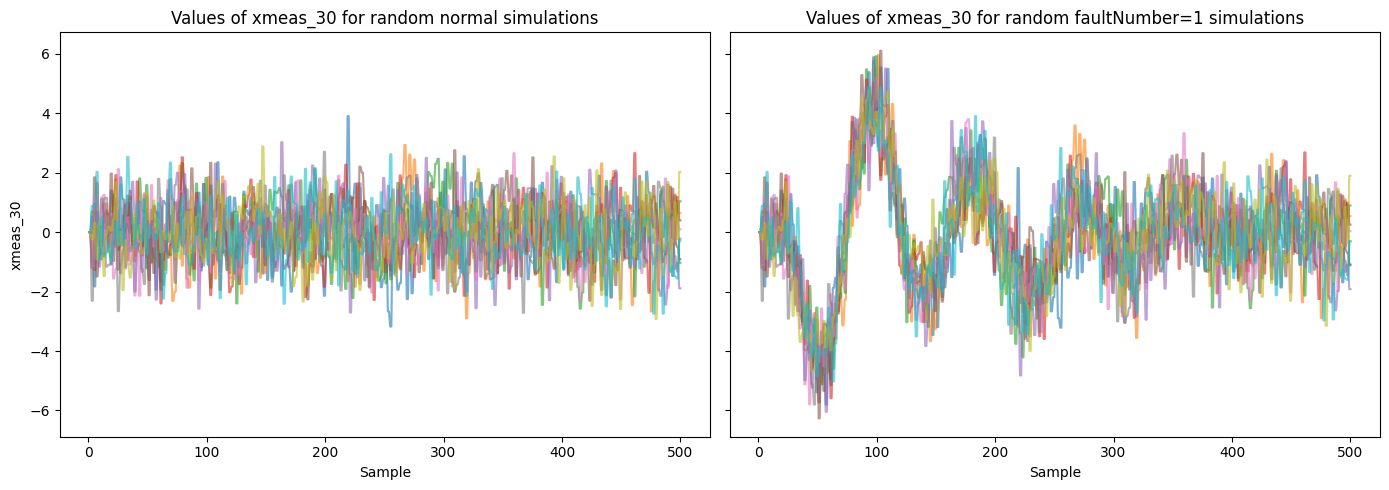

In [ ]:
var = "xmeas_30"
fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharey=True)

# Plot for fft_scaled 
for sim_run, group in fft_scaled.groupby("simulationRun"):
    if sim_run not in random_runs:
        continue
    axes[0].plot(group["sample"], group[var], alpha=0.6)
axes[0].set_title(f'Values of {var} for random normal simulations')
axes[0].set_xlabel('Sample')
axes[0].set_ylabel(var)

# Plot for anom_scaled with faultNumber == 1 
for sim_run, group in anom_scaled[anom_scaled["faultNumber"] == 1].groupby("simulationRun"):
    if sim_run not in random_runs:
        continue
    axes[1].plot(group["sample"], group[var], alpha=0.6)
axes[1].set_title(f'Values of {var} for random faultNumber=1 simulations')
axes[1].set_xlabel('Sample')

plt.tight_layout()
plt.show()

Within each faultNumber, variables react differently. This of course changes with different types of faults, that cause different fluctuations in their variables.

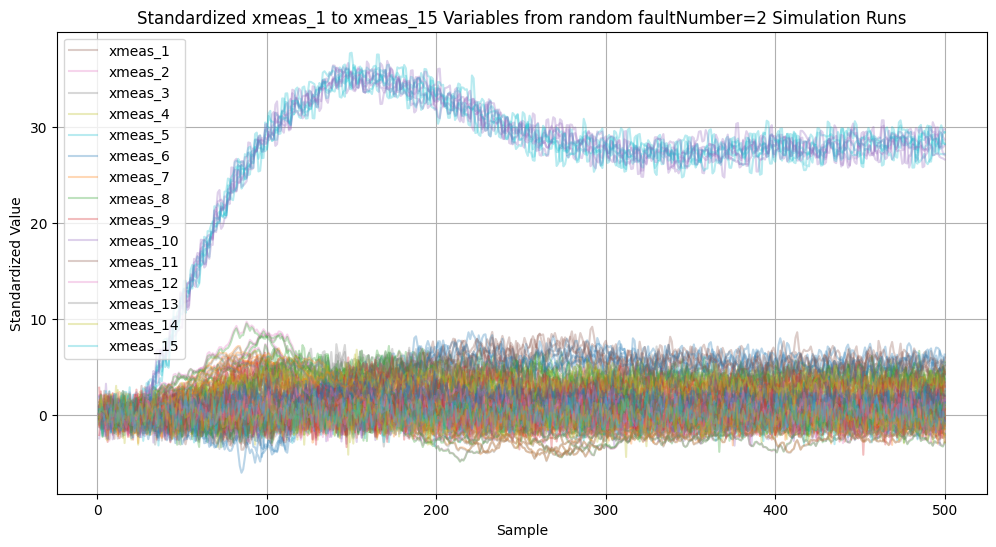

In [14]:
# There are even anomalies where only one or a few variables heavily fluctuate, 
# while other either remain stable or only fluctuate slightly. As an example:
plt.figure(figsize=(12, 6))
for sim_run, group in anom_scaled[anom_scaled['faultNumber'] == 2].groupby('simulationRun'):
    if sim_run not in random_runs:
        continue
    for i in range(1, 16):  # xmeas_1 to xmeas_15
        plt.plot(group['sample'], group[f"xmeas_{i}"], label=f"xmeas_{i}" if sim_run == random_runs[0] else "", alpha=0.3)
plt.title("Standardized xmeas_1 to xmeas_15 Variables from random faultNumber=2 Simulation Runs")
plt.xlabel("Sample")
plt.ylabel("Standardized Value")
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())
plt.grid()


#### Conclusion

With this we conclude our initial exploration of the dataset. From now on, we will be interested in developing deep learning models for two specific tasks: Time Series Classification(to distinguish between different known anomalies) and Anomaly Detection(to be able to detect when normal operating conditions are altered). To do this we will use a specific main component for our architectures, that being Temporal Convolutional Networks(TCNs), which are techniques based on the classic convolution used in image and video data processing, granting the benefit of parallelization over sequential architectures like RNNs and LSTMs, and that can capture patterns over longer periods of times, with only a linear increase in the weights.

The reasoning behind the choice of these approaches was also informed through the reading of a summary on DL methods' performance for this particular dataset, supplied here: https://arxiv.org/abs/2303.05904. The top methods were based on reconstruction or TCN.